# 1. Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats

# 2.Read the data as a data frame

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3(a). Shape of the data

In [3]:
df.shape,df.size

((1338, 7), 9366)

# 3(b). Data type of each attribute

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3(c). Checking the presence of missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.duplicated().sum()

1

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1338, 7)
(1337, 7)


from the above output, we can say that one value was duplicated which is removed successfully

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data


missing_check(df)

,Total,Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


from the above output we can say there are no missing values.

# 3(d).  5 point summary of numerical attributes

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


from the above 5 point summary, we can conclude that by comparing mean and 50% quartile: age and bmi are almost normally distributed but charges is right skewed. And 'children' should come under categorical variable.

In [11]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


# 3(e). Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

C:\Users\HP\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


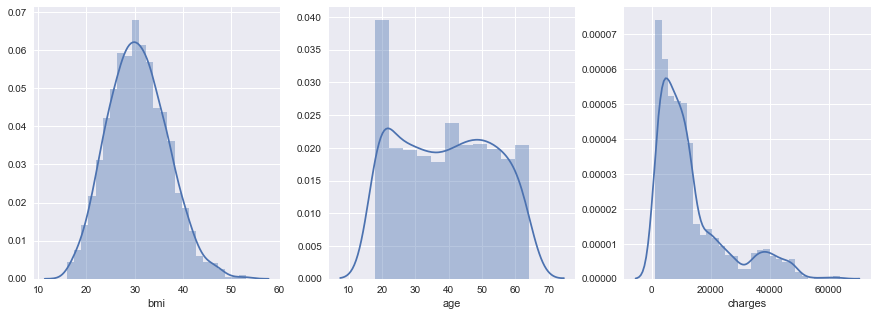

In [12]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['bmi'],ax=axs[0])
sns.distplot(df['age'],ax=axs[1])
sns.distplot(df['charges'],ax=axs[2])
plt.show()

# 3(f).  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [13]:
print('skewness of age is:', round(stats.skew(df['age']),2))
print('skewness of bmi is:', round(stats.skew(df['bmi']),2))
print('skewness of charges is:', round(stats.skew(df['charges']),2))


('skewness of age is:', 0.05)
('skewness of bmi is:', 0.28)
('skewness of charges is:', 1.51)



## 3(g). Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges’

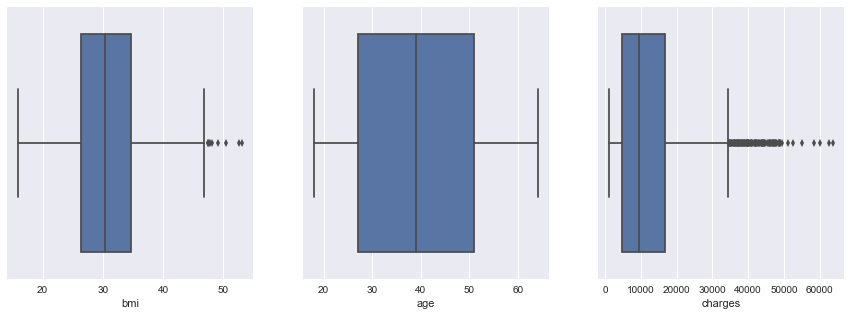

In [14]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
bmi_plot = sns.boxplot(df.bmi, ax=axs[0])
age_plot= sns.boxplot(df.age, ax=axs[1])
charges_plot = sns.boxplot(df.charges, ax=axs[2])
plt.show()

In [15]:
threshold=3
z_bmi=np.abs(stats.zscore(df.bmi))
z_age=np.abs(stats.zscore(df.age))
z_charges=np.abs(stats.zscore(df.charges))
print('outliers in bmi are at:',np.where(z_bmi>threshold))
print('outliers in age at:',np.where(z_age>threshold))
print('outliers in charges at:',np.where(z_charges>threshold))


('outliers in bmi are at:', (array([ 116,  846, 1046, 1316], dtype=int64),))
('outliers in age at:', (array([], dtype=int64),))
('outliers in charges at:', (array([  34,  543,  577,  818, 1145, 1229, 1299], dtype=int64),))


# 3(h). Distribution of categorical columns (include children) 

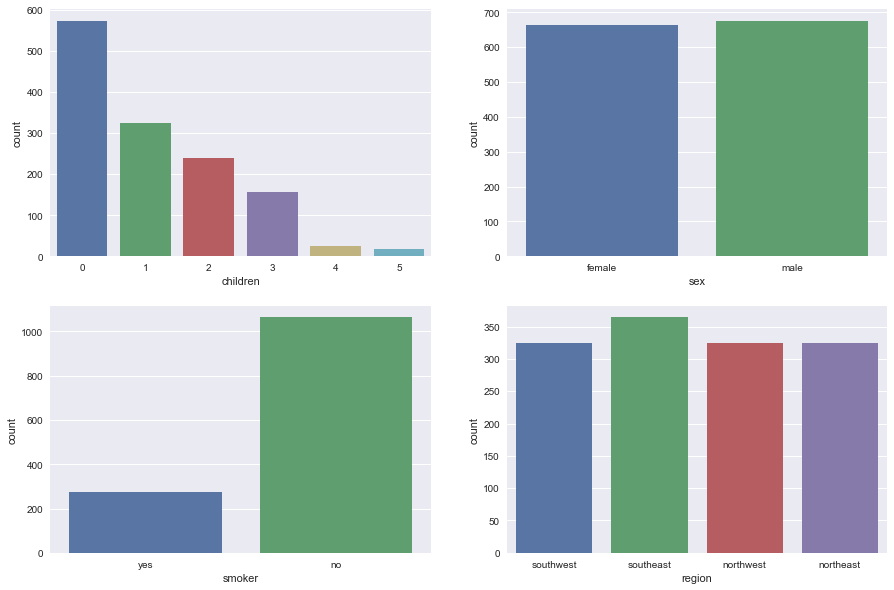

In [16]:
fig,axs=plt.subplots(2,2, figsize=(15,10))
sns.countplot(df['children'],ax=axs[0][0])
sns.countplot(df['sex'],ax=axs[0][1])
sns.countplot(df['smoker'],ax=axs[1][0])
sns.countplot(df['region'],ax=axs[1][1])
plt.show()

##### no_children counts is maximum and 5 children counts is minimum. so we can say there is a negative distribution of children. maximum children minimum count, minimum children maximum count.
##### count of males are slightly more than the count of females.
##### count of no smokers is much larger than the count of smokers.
#####  people are almost equal from all four region, the bar of southeast is slightly bigger than the bar of other three reions.

# 3(i). Pair plot that includes all the columns of the data frame

Before plotting the variables, first encode the categorical variables as pair plot does not take into account the categorical varibles.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,['sex', 'smoker', 'region']] = df.loc[:,['sex', 'smoker', 'region']].apply(le.fit_transform)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


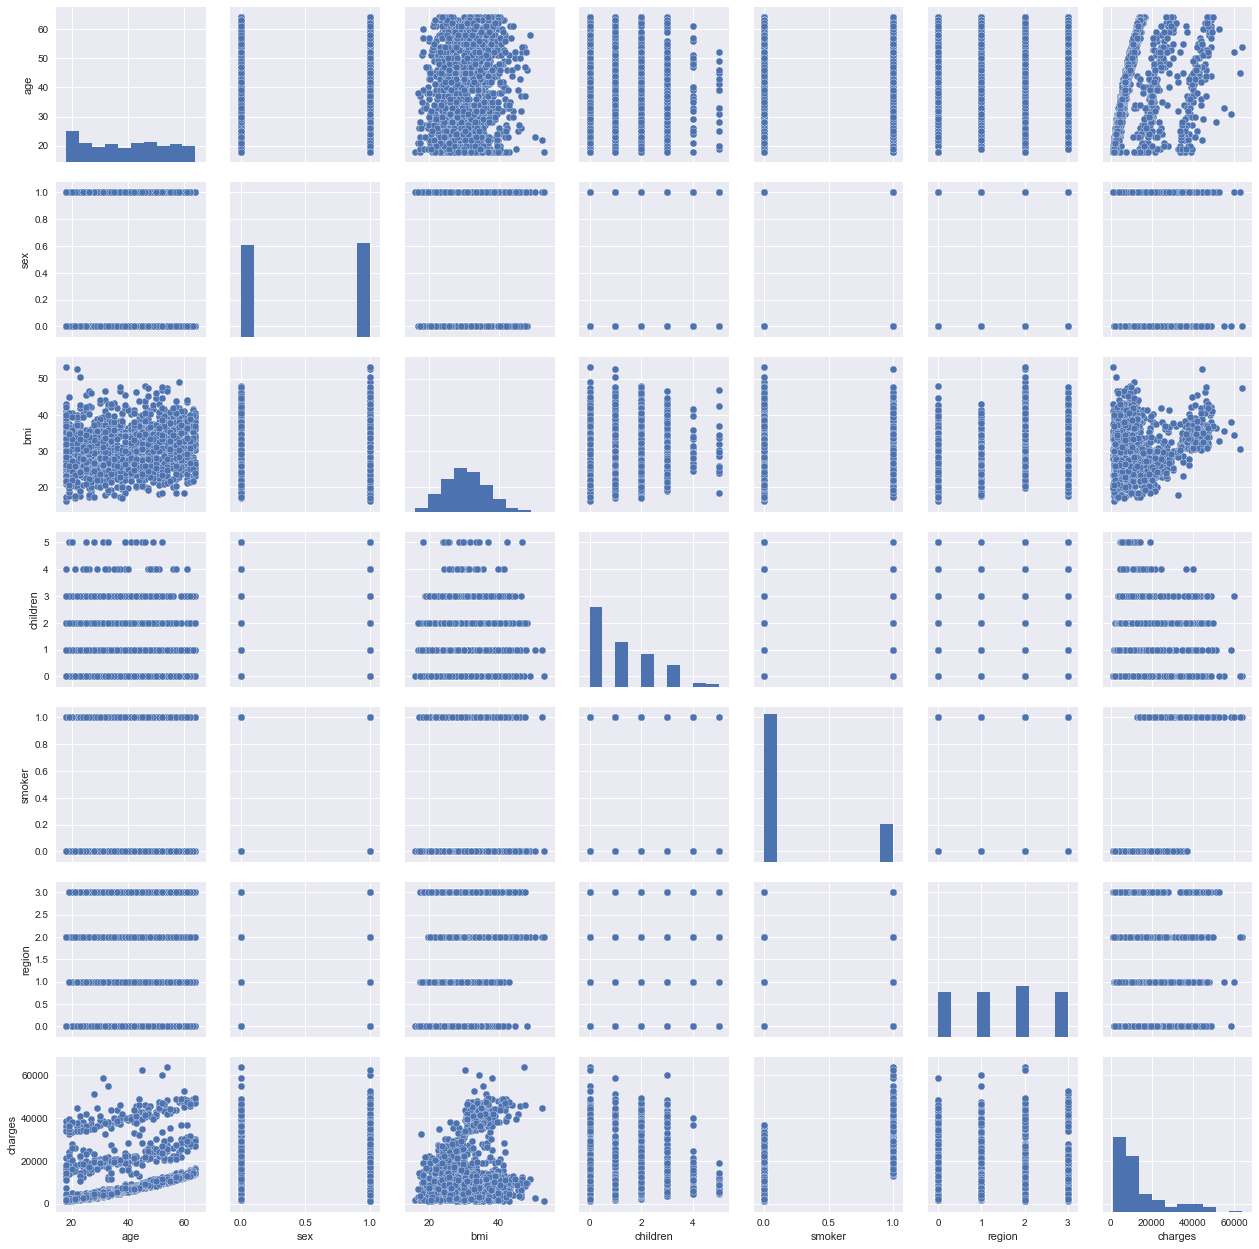

In [18]:
sns.pairplot(df)
plt.show()

As we can see in the above pairplot, there is no relationship between age and bmi, as there is cloud like structure. As Children is a categorical variable, we cannot say anything about its relationship with other numerical variables by viewing the above plot. Charges and age are showing slightly positive relation, as we can see 3 positive lines. Charges and bmi are again showing very sligtly positive relationship. And all the categorical variables column has straight lines that signifies they do not have any significant relationship with age, bmi or charges.

# 4(a). Do charges of people who smoke differ significantly from the people        who don't?
#### Ho = charges are equal for people who smoke and who dont smoke
#### Ha = charges are not equal for people who smoke and who dont smoke

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
df['charges'].describe()


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

C:\Users\HP\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


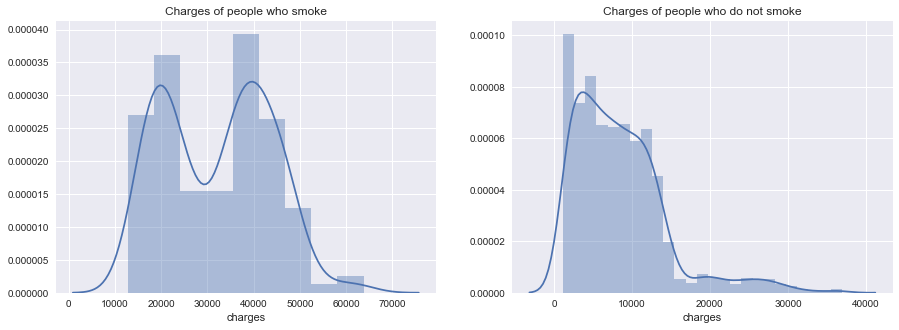

In [21]:
fig,axs=plt.subplots(1,2, figsize=(15,5))
sns.distplot(df.loc[df.smoker==1,'charges'],ax=axs[0])
sns.distplot(df.loc[df.smoker==0,'charges'],ax=axs[1])
axs[0].set_title('Charges of people who smoke')
axs[1].set_title('Charges of people who do not smoke')
plt.show()

In [22]:
from statsmodels.stats.weightstats import ztest
sample1= df.loc[df.smoker==1,'charges']
sample2= df.loc[df.smoker==0,'charges']

alpha = 0.05   

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f 'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f '\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,\t we fail to reject the Null hypothesis')

SyntaxError: invalid syntax (<ipython-input-22-872e5f5c2d99>, line 10)

In [ ]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

# 4(b). Does bmi of males differ significantly from that of females?
#### Ho = BMI for men and women are equal
#### Ha = BMI for men and women are not equal

In [ ]:
fig,axs=plt.subplots(1,2, figsize=(15,5))
sns.distplot(df.loc[df.sex==0,'bmi'],ax=axs[0])
sns.distplot(df.loc[df.sex==1,'bmi'],ax=axs[1])
axs[0].set_title('Bmi of females')
axs[1].set_title('Bmi of males')
plt.show()

In [ ]:
sample1= df.loc[df.sex=='female','bmi']
sample2= df.loc[df.sex=='male','bmi']

alpha = 0.05   

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

# 4(c). Is the proportion of smokers significantly different in different genders?
#### Ho = The proportions are equal
#### Ha = The two proportions are not equal


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


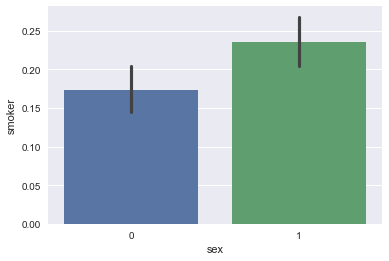

In [24]:
sns.barplot( df['sex'], df['smoker'])

0


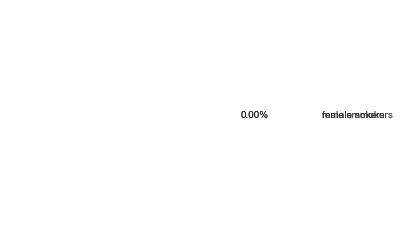

In [13]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]
n_females = df.sex.value_counts()[1] 
n_males = df.sex.value_counts()[0] 
values = [male_smokers/n_males , female_smokers/n_females]
labels = ['male smokers', 'female smokers']
print(female_smokers/n_females)
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.show()

In [15]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f 'Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

SyntaxError: invalid syntax (<ipython-input-15-104a5a343447>, line 2)

In [41]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(pval)
if pval < 0.05:
   print('With a p-value of {} the difference is significant. aka |We reject the null|'.format(round(pval,4)))
else:
    print('With a p-value of {} the difference is not significant. aka |We fail to reject the null|'.format(round(pval,4)))

0.005098746217145657
With a p-value of 0.0051 the difference is significant. aka |We reject the null|


In [40]:
n=5
print('value of n is {n}'.format(n=5))

value of n is 5


# 4(d). Is the distribution of bmi across women with no children, one child and two children, the same?
#### Ho = Bmi across women with no children, one children and two children is same
#### Ha = Bmi across women with no children, one children and two children is not same

In [ ]:
fig,axs=plt.subplots(1,3, figsize=(15,5))
sns.distplot(df.loc[df.children==0,'bmi'],ax=axs[0])
sns.distplot(df.loc[df.children==1,'bmi'],ax=axs[1])
sns.distplot(df.loc[df.children==2,'bmi'],ax=axs[2])
axs[0].set_title('Bmi of Woman having no children')
axs[1].set_title('Bmi of Woman having 1 child')
axs[2].set_title('Bmi of Woman having 2 children')
plt.show()

In [ ]:
no_child_bmi=df.loc[df.children==0,'bmi']
one_child_bmi=df.loc[df.children==1,'bmi']
two_child_bmi=df.loc[df.children==2,'bmi']
print('Count, Mean and standard deviation of woman having no child: %3d, %3.2f and %3.2f' % (len(no_child_bmi), no_child_bmi.mean(),np.std(no_child_bmi ,ddof =1)))
print('Count, Mean and standard deviation of woman having 1 child: %3d, %3.2f and %3.2f' % (len(one_child_bmi), one_child_bmi.mean(),np.std(one_child_bmi,ddof =1)))
print('Count, Mean and standard deviation of woman having 2 child: %3d, %3.2f and %3.2f' % (len(two_child_bmi), two_child_bmi.mean(),np.std(two_child_bmi,ddof =1)))


In [ ]:
woman_bmi=pd.DataFrame()
df1= pd.DataFrame({'children':0,'bmi':no_child_bmi})
df2= pd.DataFrame({'children':1,'bmi':one_child_bmi})
df3= pd.DataFrame({'children':2,'bmi':two_child_bmi})

woman_bmi=woman_bmi.append(df1)
woman_bmi=woman_bmi.append(df2)
woman_bmi=woman_bmi.append(df3)

sns.boxplot(x='children', y='bmi', data= woman_bmi)
plt.title('women bmi')
plt.show()

In [ ]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
     
mod = ols('bmi ~ children', data = woman_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p-value 0.396458 > 0.05, hence we fail to reject the Null hypothesis.

In [18]:
n=2
g=5
x=n/g
print(x)

0
